**Image classification using a CNN model.**

In this application we will use the fashion MNIST dataset and a 2D convolution layer as the main feature extractor.

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

**Loading the data.**

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. 

The classes are:

0 : T-shirt/top

1 : Trouser

2	: Pullover

3	: Dress

4	: Coat

5	: Sandal

6	: Shirt

7	: Sneaker

8	: Bag

9	: Ankle boot


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


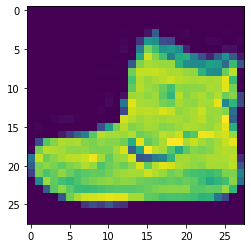

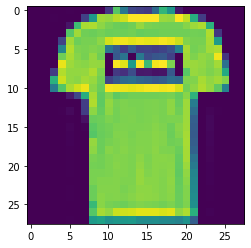

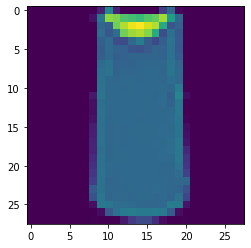

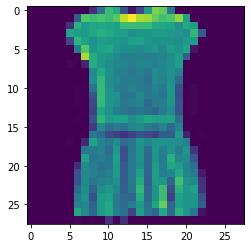

In [3]:
# Let's visualize some of the images.
for i in range(4):
  plt.imshow(x_train[i])
  plt.show()

In [4]:
# Counting the examples for each class.
pd.DataFrame(y_train, columns=['labels'])['labels'].value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: labels, dtype: int64

From the table above we can see that each class has 6000 examples.

**Fitting the model.**

In [5]:
# Defining the model

# Defining the input.
inp = tf.keras.layers.Input(shape=(28,28,1))
# Rescaling the images.
resc = tf.keras.layers.Rescaling(1./255)(inp)
# Extracting the features.
conv = tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(28,28,1))(resc)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)
# Interpreting the extracted features.
dense_1 = tf.keras.layers.Dense(units=100, activation='relu')(flat)
dense_2 = tf.keras.layers.Dense(units=50, activation='relu')(dense_1)
# Defining the output.
output = tf.keras.layers.Dense(units=10, activation='softmax')(dense_2)

model = tf.keras.Model(inputs=inp, outputs=output)

# Compiling the model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')



In [6]:
model.fit(x_train, y_train,
          epochs=10, 
          validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4222 - accuracy: 0.8478 - val_loss: 0.3559 - val_accuracy: 0.8673
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2816 - accuracy: 0.8971 - val_loss: 0.2929 - val_accuracy: 0.8941
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2357 - accuracy: 0.9118 - val_loss: 0.2699 - val_accuracy: 0.9023
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2060 - accuracy: 0.9232 - val_loss: 0.2621 - val_accuracy: 0.9069
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1796 - accuracy: 0.9322 - val_loss: 0.2640 - val_accuracy: 0.9077
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1579 - accuracy: 0.9408 - val_loss: 0.2684 - val_accuracy: 0.9110
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1360 - accuracy: 0.9485 - val_loss: 0.2778 -

We can see from the different metrics that our model did a great job distinguishing the different categories in our dataset.  
